In [1]:
from io import StringIO

import matplotlib.pyplot as plt
import numpy as np
from DataHandler import DataHandler
from DecisionTreeHandler import DecisionTreeHandler

In [2]:
datasetFileName = 'ObesityData.csv'
ordinalFeaturesMappers = {
    ("CAEC", "CALC"): ["no", "Sometimes", "Frequently", "Always"]
}

**Loading Data**

In [3]:
dataHandler = DataHandler()
dataHandler.loadDataFrom(datasetFileName)
features = dataHandler.features

**Preprocessing Data**

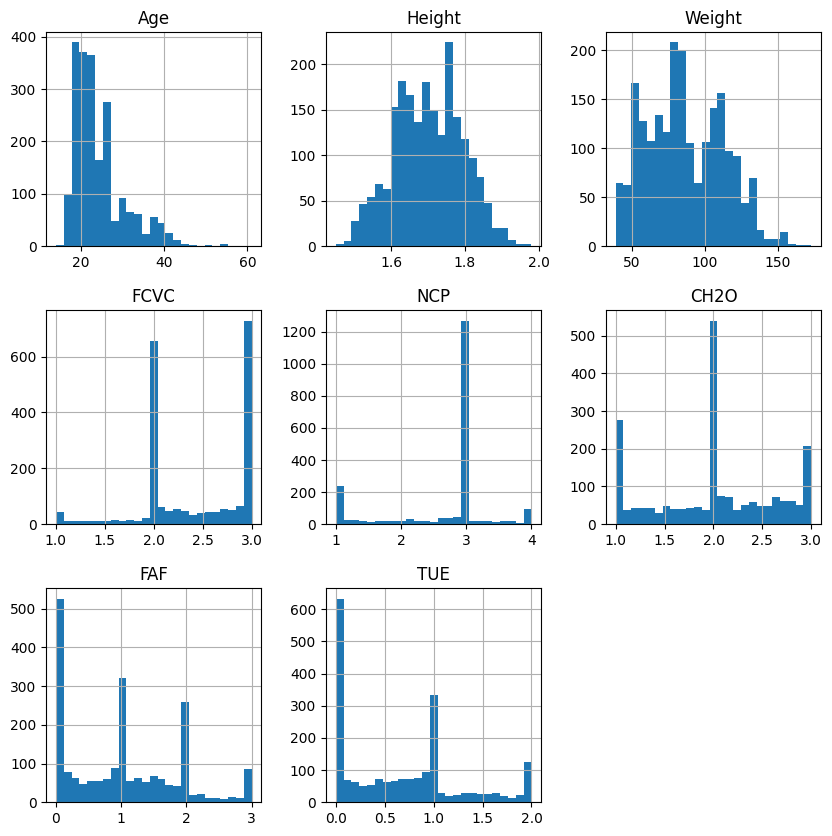

Any missing values?  False


In [4]:
dataHandler.rawDataset.hist(bins=25,figsize=(10,10))
plt.show()

print("Any missing values? ", dataHandler.rawDataset.isnull().values.any())

preparedData = dataHandler.encodeData(ordinalFeaturesMappers)

**Basic Tree**

In [5]:
dth = DecisionTreeHandler()
dth.repeatKFoldsNTimes(preparedData, 10, 10)
accuracyList = dth.accs
sizeList = dth.sizes
print("mean accuracy", np.mean(accuracyList))
print("standard deviation", np.std(accuracyList))
print("Mean number of nodes", np.mean(sizeList))

mean accuracy 0.9142557900384515
standard deviation 0.018714598935944102
Mean number of nodes 298.56


**Max Depth**

In [6]:
max_MAX_DEPTH = 12

means = []
deviations = []

for depth in range(1, max_MAX_DEPTH+1):
    MAX_DEPTH = depth
    accuracyList = DecisionTreeHandler(MAX_DEPTH).repeatKFoldsNTimes(preparedData, 10, 10)
    means.append(np.mean(accuracyList))
    deviations.append(np.std(accuracyList))

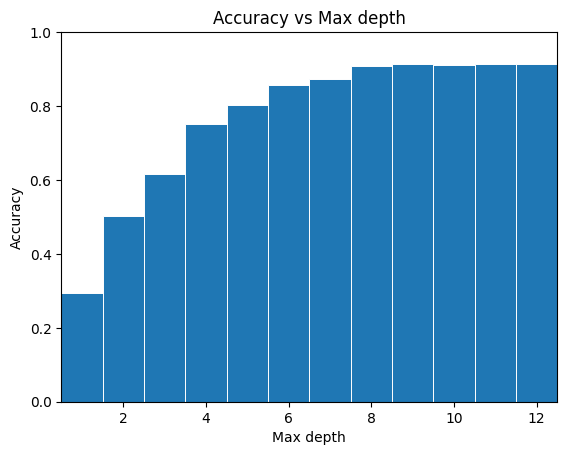

In [7]:
fig, ax = plt.subplots()

ax.bar([i for i in range(1, max_MAX_DEPTH+1)], means, width=1, edgecolor="white", linewidth=0.7)

ax.set(ylim=(0, 1), xlim=(0.5,max_MAX_DEPTH+0.5), xlabel="Max depth", ylabel="Accuracy", title="Accuracy vs Max depth")

plt.show()

**Reducing feature dimensions**

In [4]:
for feature in dataHandler.features:
    preparedData = dataHandler.encodeData(ordinalFeaturesMappers, feature)
    dth = DecisionTreeHandler()
    dth.repeatKFoldsNTimes(preparedData, 10, 10)
    accuracyList = dth.accs
    sizeList = dth.sizes

    print("Abandoned feature:", feature)
    print("Mean accuracy", np.mean(accuracyList))
    print("Standard deviation", np.std(accuracyList))
    print("Mean number of nodes", np.mean(sizeList))

Abandoned feature: Gender
Mean accuracy 0.9117028078333184
Standard deviation 0.01887950822613935
Mean number of nodes 313.32
Abandoned feature: Age
Mean accuracy 0.9179513547348654
Standard deviation 0.01987535083179553
Mean number of nodes 291.66
Abandoned feature: Height
Mean accuracy 0.8321150406867567
Standard deviation 0.023632268855320018
Mean number of nodes 531.2
Abandoned feature: Weight
Mean accuracy 0.7348618438701601
Standard deviation 0.026925463974234964
Mean number of nodes 824.8
Abandoned feature: family_history_with_overweight
Mean accuracy 0.9151580524009656
Standard deviation 0.017166361295195113
Mean number of nodes 299.9
Abandoned feature: FAVC
Mean accuracy 0.9161998122149692
Standard deviation 0.01909894618692097
Mean number of nodes 282.84
Abandoned feature: FCVC
Mean accuracy 0.9147353125279443
Standard deviation 0.02063140237574655
Mean number of nodes 299.56
Abandoned feature: NCP
Mean accuracy 0.9157743896986497
Standard deviation 0.019686899976073348
Mean 

**Generating Tree Graph**

In [9]:
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('tree.png')
# Image(graph.create_png())